In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from io import BytesIO
import numpy as np

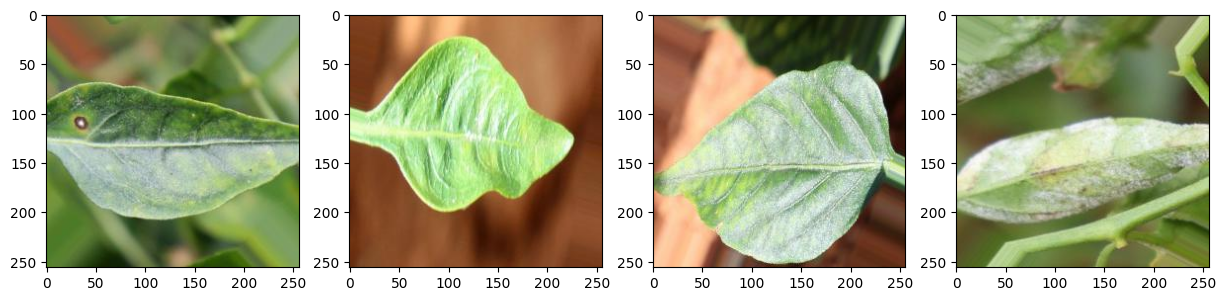

In [ ]:
TRAIN_DIR = '/content/drive/MyDrive/Capstone Bangkit/augment/train'
VALIDATION_DIR = '/content/drive/MyDrive/Capstone Bangkit/augment/validation'

train_cerospora = os.path.join(TRAIN_DIR, 'Cercospora')
train_healthy = os.path.join(TRAIN_DIR, 'Healthy')
train_nutrient = os.path.join(TRAIN_DIR, 'Nutrient Deficiency')
train_powdery = os.path.join(TRAIN_DIR, 'Powdery Mildew')

fig, ax = plt.subplots(1,4, figsize=(15,15))

ax[0].imshow(tf.keras.utils.load_img(os.path.join(train_cerospora, os.listdir(train_cerospora)[0])))
ax[1].imshow(tf.keras.utils.load_img(os.path.join(train_healthy, os.listdir(train_healthy)[0])))
ax[2].imshow(tf.keras.utils.load_img(os.path.join(train_nutrient, os.listdir(train_nutrient)[0])))
ax[3].imshow(tf.keras.utils.load_img(os.path.join(train_powdery, os.listdir(train_powdery)[0])))

plt.show()

##Trasfer Learning##

Loading pre-trained weight from `inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5` model

In [ ]:
pre_trained_weight = '/content/drive/MyDrive/Capstone Bangkit/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = tf.keras.applications.inception_v3.InceptionV3(
    input_shape = (150,150,3),
    include_top = False,
    weights = None
)

pre_trained_model.load_weights(pre_trained_weight)

pre_trained_model.trainable = False

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

Dense Layer

In [ ]:
model=  tf.keras.layers.Flatten()(last_output)
model = tf.keras.layers.Rescaling(1./255)(model)
model = tf.keras.layers.Dense(128, activation='relu')(model)
model = tf.keras.layers.Dropout(0.3)(model)
model = tf.keras.layers.Dense(4, activation='softmax')(model)


model = tf.keras.Model(pre_trained_model.input, model)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 150, 150, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 74, 74, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 74, 74, 32)     │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 74, 74, 32)     │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 72, 72, 32)     │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 72, 72, 32)     │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 72, 72, 32)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 72, 72, 64)     │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 72, 72, 64)     │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 72, 72, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 35, 35, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 35, 35, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 35, 35, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 35, 35, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 33, 33, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 33, 33, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 13,792,804 (52.62 MB)

 Trainable params: 4,817,540 (18.38 MB)

 Non-trainable params: 8,975,264 (34.24 MB)

Load training and validation dataset

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size=(150,150),
    batch_size= 64,
    label_mode= 'categorical'
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    VALIDATION_DIR,
    image_size=(150,150),
    batch_size= 64,
    label_mode= 'categorical'
)

Found 7259 files belonging to 4 classes.
Found 2218 files belonging to 4 classes.


##Preporocessing##
Rescale pixels of an image to a range of 0-255

In [ ]:
def preprocess(image,label):
    image = tf.keras.applications.inception_v3.preprocess_input(image)
    return image, label

train_scaled = train_dataset.map(preprocess)
validation_scaled = validation_dataset.map(preprocess)

Augmentation

In [ ]:
Augmentation = tf.keras.models.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomTranslation(0.2, 0.2),
    tf.keras.layers.RandomContrast(0.3),
    tf.keras.layers.RandomZoom(0.1),
])

# model_aug = tf.keras.Model(Augmentation, model)
# model = model(Augmentation)
inputs = tf.keras.Input(shape=(150, 150,3))
aug = Augmentation(inputs)
aug = model(aug)
# model = tf.keras.Model(inputs, model)

Optimization

In [ ]:
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE
BATCH_SIZE = 32

# Optimize the datasets for training
train_final = (train_scaled
                       .cache()
                       .shuffle(SHUFFLE_BUFFER_SIZE)
                       .prefetch(PREFETCH_BUFFER_SIZE)
                       # .batch(BATCH_SIZE)
                       )

test_final = (validation_scaled
                      .cache()
                      .prefetch(PREFETCH_BUFFER_SIZE)
                      # .batch(BATCH_SIZE)
                      )

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

Callback

In [ ]:
class EarlyStoppingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if logs['accuracy'] >= 0.99 and logs['val_accuracy'] >= 0.90:
          print("Training stopped.")
          self.model.stop_training = True

Train the model

In [ ]:
history = model.fit(
    train_final,
    validation_data=test_final,
    epochs = 18,
    callbacks = [EarlyStoppingCallback()]
)

Epoch 1/18
114/114 ━━━━━━━━━━━━━━━━━━━━ 1691s 5s/step - accuracy: 0.5091 - loss: 1.2662 - val_accuracy: 0.7931 - val_loss: 0.8124
Epoch 2/18
114/114 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.7860 - loss: 0.7461 - val_accuracy: 0.8386 - val_loss: 0.5319
Epoch 3/18
114/114 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.8524 - loss: 0.5131 - val_accuracy: 0.8305 - val_loss: 0.4623
Epoch 4/18
114/114 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.8924 - loss: 0.3711 - val_accuracy: 0.8508 - val_loss: 0.4219
Epoch 5/18
114/114 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.9187 - loss: 0.3065 - val_accuracy: 0.8571 - val_loss: 0.4126
Epoch 6/18
114/114 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9376 - loss: 0.2472 - val_accuracy: 0.8611 - val_loss: 0.4117
Epoch 7/18
114/114 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.9558 - loss: 0.1975 - val_accuracy: 0.8503 - val_loss: 0.4091
Epoch 8/18
114/114 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.9606 - loss: 0.1619 - val_

Evaluation

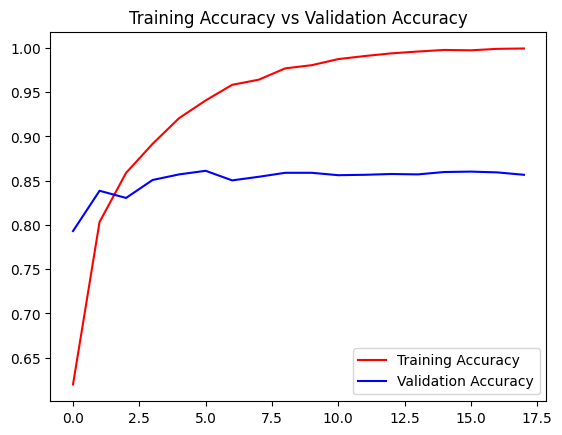

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.legend(loc=0)
plt.show()

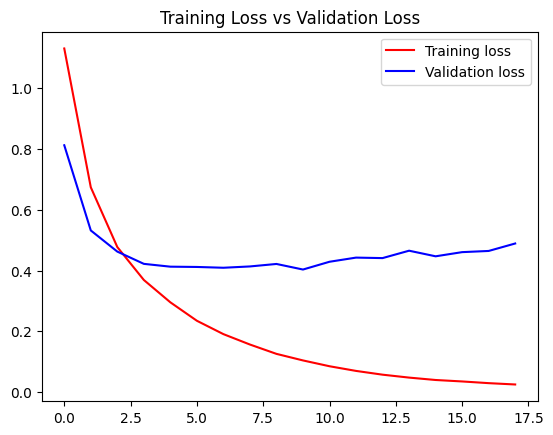

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training Loss vs Validation Loss')
plt.legend(loc=0)
plt.show()

A function for creating the prediction and printing the output

In [ ]:
import io
import ipywidgets as widgets
from IPython.display import display

uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

def file_predict(filename, file, out):
    image = tf.keras.utils.load_img(file, target_size=(150, 150))
    image = tf.keras.utils.img_to_array(image)
    # image = image/255.0
    image = tf.keras.applications.inception_v3.preprocess_input(image)
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image, verbose=0)[0]

    with out:

        print(f'\nmodel output: {prediction}')

        prediction_index = np.argmax(prediction)

        classes = ["Cercospora","Healthy", "Nutrient Deficiency", "Powdery Mildew"]

        predicted_class = classes[prediction_index]

        print(f'{filename} is {predicted_class}')


def on_upload_change(change):
    """A function for getting files from the widget and running the prediction."""
    # Get the newly uploaded file(s)

    for name, file_info in change['new'].items(): # Access file information using the name as key
        # Create a BytesIO object from the file content
        file_jpgdata = io.BytesIO(file_info['content'])
        file_predict(name, file_jpgdata, out)


uploader.observe(on_upload_change, names='value')

FileUpload(value={}, accept='image/*', description='Upload', multiple=True)

Output()

Save model

In [ ]:
model.save('/content/drive/MyDrive/Capstone Bangkit/Variables/TaniPredict_cabai_3.h5')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
# converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# converter.inference_input_type = tf.int8
# converter.inference_output_type = tf.int8
tflite_model = converter.convert()

open('/content/drive/MyDrive/Capstone Bangkit/Variables/TaniPredict_cabai_.tflite', 'wb').write(tflite_model)

Saved artifact at '/tmp/tmp3z7bwm0e'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  136091019160992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136090975901248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136090975902128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136090975510320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136090975909344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136090976026688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136091020571776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136090975911632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136090975910928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136090976034608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13609097603056

55137256